In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
#symulator kwantowy
backend = Aer.get_backend('qasm_simulator')
n=1
seria=4000

In [3]:
#ustalenie wartości k
indeksy=441+380+305+379
k1=indeksy%2
k2=indeksy%(2**2)
k3=indeksy%(2**3)

In [4]:
#obliczenie wartości kątów
from math import pi
theta0=pi/k2
fi0=2*pi/k3

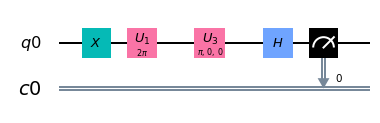

In [5]:
#przygotowanie układu do pomiarów X
nx=n
qx = QuantumRegister(nx)
cx = ClassicalRegister(nx)

circuitX = QuantumCircuit(qx, cx)
#ustawienie początkowego stanu kubitu
if k1==1:
    circuitX.x(qx[0])
#ustawienie (obrót u1, u3) kubitu do odpowiedniego stanu według k1, k2
circuitX.u1(fi0, qx[0])
circuitX.u3(theta0, 0, 0, qx[0])
#pomiar X
circuitX.h(qx[0])
circuitX.measure(qx[0], cx[0])
circuitX.draw(output='mpl')

In [6]:
# backend = Aer.get_backend('statevector_simulator')
# out = execute(circuitX,backend).result().get_statevector()
# plot_bloch_multivector(out)

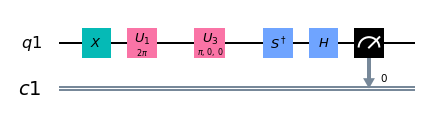

In [7]:
#przygotowanie układu do pomiarów Y
ny=n
qy = QuantumRegister(ny)
cy = ClassicalRegister(ny)

circuitY = QuantumCircuit(qy, cy)
#ustawienie początkowego stanu kubitu
if k1==1:
    circuitY.x(qy[0])
#ustawienie (obrót u1, u3) kubitu do odpowiedniego stanu według k1, k2
circuitY.u1(fi0, qy[0])
circuitY.u3(theta0, 0, 0, qy[0])
#pomiar Y
circuitY.sdg(qy[0])
circuitY.h(qy[0])
circuitY.measure(qy[0], cy[0])
circuitY.draw(output='mpl')

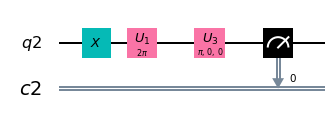

In [8]:
#przygotowanie układu do pomiarów Z
nz=n
qz = QuantumRegister(nz)
cz = ClassicalRegister(nz)

circuitZ = QuantumCircuit(qz, cz)
#ustawienie początkowego stanu kubitu
if k1==1:
    circuitZ.x(qz[0])
#ustawienie (obrót u1, u3) kubitu do odpowiedniego stanu według k1, k2
circuitZ.u1(fi0, qz[0])
circuitZ.u3(theta0, 0, 0, qz[0])
#pomiar Z
circuitZ.measure(qz[0], cz[0])
circuitZ.draw(output='mpl')

In [9]:
#uruchomienie obwodów i wyświetlenie wyników

simX = execute(circuitX, backend, shots=seria)
resultX = simX.result()
print("X: ", resultX.get_counts(circuitX))

simY = execute(circuitY, backend, shots=seria)
resultY = simY.result()
print("Y: ", resultY.get_counts(circuitY))

simZ = execute(circuitZ, backend, shots=seria)
resultZ = simZ.result()
print("Z: ", resultZ.get_counts(circuitZ))

X:  {'1': 2035, '0': 1965}
Y:  {'1': 2003, '0': 1997}
Z:  {'0': 4000}


In [10]:
#obliczenie prawdopodobieństwa
p={'x':[0,0], 'y':[0,0], 'z':[0,0]}

p['x'][0]=resultX.get_counts(circuitX).get('0',0)
p['x'][1]=resultX.get_counts(circuitX).get('1',0)
p['y'][0]=resultY.get_counts(circuitY).get('0',0)
p['y'][1]=resultY.get_counts(circuitY).get('1',0)
p['z'][0]=resultZ.get_counts(circuitZ).get('0',0)
p['z'][1]=resultZ.get_counts(circuitZ).get('1',0)

for i in p.keys():
    for j in range(len(p[i])):
        p[i][j]=p[i][j]/seria
print(p)

{'x': [0.49125, 0.50875], 'y': [0.49925, 0.50075], 'z': [1.0, 0.0]}
